In [1]:
import os
import sys

import pandas as pd
from ast import literal_eval

from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
current_dir = os.getcwd()

In [3]:
sys.path.append(os.path.join(current_dir, '..', 'src'))

In [5]:
import analysis_helper, colab_utils

In [6]:
# Define file paths
project_filenames = {
    "job_prg_name_filename": "data/interim/post_processing_job_postings.csv",
    "job_timeline_filename": "data/interim/post_processing_job_timeline.csv",
    "foundal_skills_filename": "data/interim/post_processing_soft_skills.csv",
    "replace_skills_prg_name": "data/interim/replace_skills_job_programs.csv",
    "replace_skills_timeline": "data/interim/replace_skills_job_timeline.csv",
}

In [7]:
try:
    env_info = colab_utils.setup_environment(
        filenames=project_filenames,
        colab_project_path=current_dir
    )
    if env_info["in_colab"]:
        print("Google Colab detected.")
    else:
        print("Not running in Google Colab.")
    
    print(f"Foundational Skills File: {env_info['foundal_skills_filename']}")
except Exception as e:
    print(f"Error setting up environment: {e}")

Error setting up environment: name 'current_dir' is not defined


In [4]:
del current_dir

# Reading the foundational skills

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
# Import soft skills data
df_soft_skills = pd.read_csv(env_info['foundal_skills_filename'])

NameError: name 'env_info' is not defined

In [ ]:
# Read str as list in csv files
# df_soft_skills['alt_labels']=df_soft_skills['alt_labels'].apply(literal_eval)
df_soft_skills['alt_labels_lemm']=df_soft_skills['alt_labels_lemm'].apply(literal_eval)

# Reading job posting and replacing the alt_labels with the lemmatized alt_labels

In [ ]:
# Read job description data
df_coop_prg_name = pd.read_csv(env_info['replace_skills_prg_name'])
df_coop_timeline = pd.read_csv(env_info['replace_skills_timeline'])

In [10]:
df_coop_timeline['date_goes_live'] = pd.to_datetime(df_coop_timeline['date_goes_live'])

NameError: name 'df_coop_timeline' is not defined

In [11]:
df_coop_timeline['year'] = df_coop_timeline['date_goes_live'].dt.year

NameError: name 'df_coop_timeline' is not defined

In [50]:
word_mapping = dict(zip(df_soft_skills['soft_skill_lemm'], df_soft_skills['alt_labels_lemm']))

In [51]:
df_coop_prg_name.shape

(75519, 7)

In [52]:
text_column = 'job_description_replaced_skills'
grp_prg_name = df_coop_prg_name.groupby('program_name')

In [53]:
grp_prg_name.size()

program_name
Biological Engineering              8644
Biomedical Engineering              6640
Computer Engineering               11076
Computer Science                    9110
Engineering Systems & Computing    12008
Environmental Engineering           6497
Mechanical Engineering              6240
Software Engineering                9016
Water Resources Engineering         6288
dtype: int64

In [54]:
grouped_data_term_frequencies = grp_prg_name.progress_apply(lambda group: analysis_helper.calculate_term_frequencies(group, text_column, word_mapping.keys()))
grouped_data_term_counts = grp_prg_name.progress_apply(lambda group: analysis_helper.calculate_term_counts(group, text_column, word_mapping.keys()))
grouped_data_document_frequencies = grp_prg_name.progress_apply(lambda group: analysis_helper.calculate_document_frequencies(group, text_column, word_mapping.keys()))

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [55]:
count_skills_prg_name = analysis_helper.calculate_posting_counts_by_skills(grp_prg_name, text_column, word_mapping.keys())

Calculating posting counts: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


In [56]:
count_skills_prg_name.sort_index(axis=1)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
Biological Engineering,135,306,484,596,686,795,788,794,739,719,...,63,50,54,27,13,4,1,0,0,1
Biomedical Engineering,97,208,343,397,520,591,584,629,612,574,...,60,41,50,16,13,7,1,1,0,0
Computer Engineering,82,159,311,407,636,751,801,936,998,1005,...,183,150,90,77,28,16,14,5,2,1
Computer Science,69,121,227,309,450,544,617,755,794,825,...,182,114,88,55,41,9,10,8,6,0
Engineering Systems & Computing,98,182,328,464,693,789,933,1011,1057,1083,...,201,137,117,74,32,12,11,9,4,0
Environmental Engineering,96,228,374,491,506,619,617,565,554,496,...,73,38,36,26,13,7,1,0,0,0
Mechanical Engineering,84,148,266,369,456,503,574,614,601,542,...,60,53,46,27,10,7,2,1,0,1
Software Engineering,64,120,219,296,466,523,598,730,841,794,...,178,131,82,55,31,18,14,6,3,1
Water Resources Engineering,97,212,371,467,484,621,585,539,566,466,...,59,45,39,26,11,1,1,1,0,0


In [62]:
count_skills_prg_name_sorted = count_skills_prg_name.sort_index(axis=1)
count_skills_prg_name_sorted.to_csv(os.path.join(current_dir, '..', 'data/processed/count_skills_prg_name_sorted.csv'))


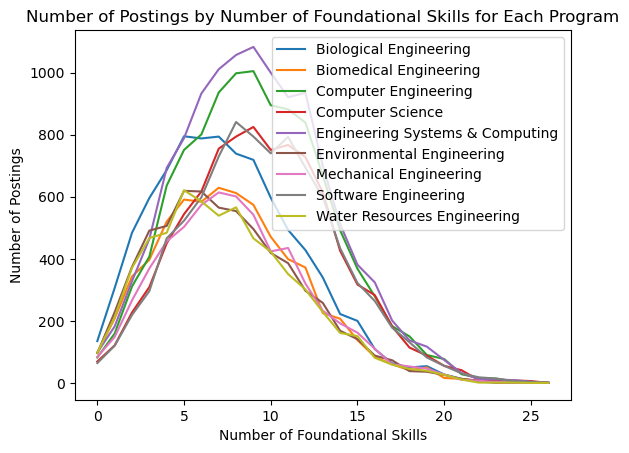

In [63]:
analysis_helper.plot_line_graph(count_skills_prg_name.sort_index(axis=1), 'Number of Postings by Number of Foundational Skills for Each Program')

In [64]:
document_counts_tf_prg_name = analysis_helper.count_document_per_group_with_term_occurrences(grp_prg_name, text_column=text_column, terms=word_mapping.keys())

Counting term occurrences per group: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:09<00:00,  1.10s/it]


In [71]:
analysis_helper.create_all_skill_tables(document_counts_tf_prg_name, os.path.join(env_info['project_dir'], 'reports', 'document_counts_tf_prg_name.xlsx'))

KeyError: 'project_dir'

In [ ]:
term_occurrences_per_prg_name = analysis_helper.count_document_per_group_with_total_term_occurrences(grp_prg_name, text_column, word_mapping.keys())

In [ ]:
term_occurrences_per_prg_name.to_csv('reports/term_occurrences_per_prg_name.csv')
term_occurrences_per_prg_name

In [ ]:
print("Term Count:")

# Compute average along rows (axis=1)
average_values = grouped_data_term_counts.sum(axis=0)

# Sort the pivot table based on average values
grouped_data_term_counts = grouped_data_term_counts[average_values.sort_values(ascending=False).index]

grouped_data_term_counts.to_csv("reports/prg_name_term_counts.csv")

grouped_data_term_counts


In [ ]:
print("Term Frequencies:")

# Compute average along rows (axis=1)
average_values = grouped_data_term_frequencies.mean(axis=0)

# Sort the pivot table based on average values
grouped_data_term_frequencies = grouped_data_term_frequencies[average_values.sort_values(ascending=False).index]

grouped_data_term_frequencies.to_csv("reports/prg_name_term_freq.csv")

grouped_data_term_frequencies

In [ ]:
print("Document Frequencies:")

# Compute average along rows (axis=1)
average_values = grouped_data_document_frequencies.mean(axis=0)

# Sort the pivot table based on average values
grouped_data_document_frequencies = grouped_data_document_frequencies[average_values.sort_values(ascending=False).index]

grouped_data_document_frequencies.to_csv("reports/prg_name_doc_freq.csv")

grouped_data_document_frequencies

In [ ]:
grp_yearly = df_coop_timeline.groupby('year')

In [ ]:
grp_yearly.size()

In [ ]:
grouped_year_term_frequencies = grp_yearly.progress_apply(lambda group: analysis_helper.calculate_term_frequencies(group, text_column, word_mapping.keys()))
grouped_year_term_counts = grp_yearly.progress_apply(lambda group: analysis_helper.calculate_term_counts(group, text_column, word_mapping.keys()))
grouped_year_document_frequencies = grp_yearly.progress_apply(lambda group: analysis_helper.calculate_document_frequencies(group, text_column, word_mapping.keys()))

In [ ]:
count_skills_yearly = analysis_helper.calculate_posting_counts_by_skills(grp_yearly, text_column, word_mapping.keys())

In [ ]:
count_skills_yearly_sorted = count_skills_yearly.sort_index(axis=1)
count_skills_yearly_sorted.to_csv('reports/count_skills_yearly_sorted.csv')

In [ ]:
analysis_helper.plot_line_graph(count_skills_yearly_sorted.sort_index(axis=1), title="Foundational skills in job postings categorized by years")

In [ ]:
document_counts_tf_yearly = analysis_helper.count_document_per_group_with_term_occurrences(grp_yearly, text_column=text_column, terms=word_mapping.keys())

In [ ]:
analysis_helper.create_all_skill_tables(document_counts_tf_yearly, 'reports/document_counts_tf_yearly.xlsx')

In [ ]:
term_occurrences_per_year = analysis_helper.count_document_per_group_with_total_term_occurrences(grp_yearly, text_column, word_mapping.keys())

In [ ]:
term_occurrences_per_year.to_csv('reports/term_occurrences_per_yearly.csv')
term_occurrences_per_year

In [ ]:
print("Term Count:")

# Compute average along rows (axis=1)
average_values = grouped_year_term_counts.mean(axis=0)

# Sort the pivot table based on average values
grouped_year_term_counts = grouped_year_term_counts[average_values.sort_values(ascending=False).index]

grouped_year_term_counts.to_csv("reports/year_term_counts.csv")

grouped_year_term_counts

In [ ]:
print("Term Frequencies:")

# Compute average along rows (axis=1)
average_values = grouped_year_term_frequencies.mean(axis=0)

# Sort the pivot table based on average values
grouped_year_term_frequencies = grouped_year_term_frequencies[average_values.sort_values(ascending=False).index]

grouped_year_term_frequencies.to_csv("reports/year_term_freq.csv")

grouped_year_term_frequencies


In [ ]:
print("Document Frequencies:")
# Compute average along rows (axis=1)
average_values = grouped_year_document_frequencies.mean(axis=0)

# Sort the pivot table based on average values
grouped_year_document_frequencies = grouped_year_document_frequencies[average_values.sort_values(ascending=False).index]

grouped_year_document_frequencies.to_csv("reports/year_doc_freq.csv")

grouped_year_document_frequencies
